## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with AG News Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import re
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

The ag news dataset comprises around 18000 news text in 4 categories.

In [ ]:
# Read the csv file agnews.csv
mydata_train = pd.read_csv('agnews.csv')

In [ ]:
# Print the news categories in the dataset
print(list(mydata_train.ClassIndex))

[1, 1, 1, 1, 2, 2, 1, 1, 3, 4, 2, 4, 4, 3, 2, 2, 4, 3, 4, 4, 3, 3, 2, 1, 2, 3, 2, 2, 4, 4, 2, 1, 2, 4, 1, 1, 1, 1, 2, 1, 1, 3, 3, 4, 2, 2, 3, 3, 2, 1, 3, 1, 4, 1, 1, 2, 1, 1, 1, 4, 4, 1, 2, 1, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 4, 4, 4, 3, 4, 1, 2, 1, 4, 2, 3, 1, 1, 2, 4, 4, 4, 4, 4, 2, 1, 4, 4, 2, 1, 1, 3, 1, 1, 3, 1, 2, 2, 3, 4, 2, 4, 4, 4, 1, 3, 1, 3, 1, 3, 1, 3, 2, 4, 1, 1, 4, 1, 2, 4, 3, 1, 4, 2, 1, 3, 3, 3, 4, 1, 3, 3, 2, 1, 3, 3, 2, 4, 4, 2, 3, 4, 3, 1, 3, 3, 2, 3, 1, 1, 2, 2, 2, 4, 3, 2, 2, 3, 1, 3, 3, 2, 2, 3, 1, 2, 4, 1, 1, 3, 3, 2, 4, 3, 3, 1, 3, 2, 2, 1, 3, 4, 1, 2, 1, 3, 2, 1, 2, 1, 4, 1, 1, 3, 3, 3, 2, 3, 2, 4, 2, 2, 2, 1, 1, 3, 1, 2, 4, 4, 2, 3, 2, 2, 3, 2, 1, 3, 3, 2, 4, 2, 1, 4, 1, 1, 1, 4, 1, 1, 3, 4, 2, 3, 1, 3, 2, 4, 3, 3, 1, 3, 2, 4, 4, 4, 2, 1, 1, 1, 2, 3, 4, 1, 2, 3, 2, 1, 4, 2, 2, 3, 4, 3, 3, 3, 3, 4, 2, 1, 1, 3, 3, 2, 3, 4, 3, 3, 4, 3, 4, 1, 2, 2, 4, 4, 4, 3, 1, 4, 4, 4, 4, 2, 3, 3, 3, 4, 1, 3, 4, 4, 1, 1, 4, 3, 2, 3, 4, 3, 2, 3, 3, 2, 3, 4, 2, 4, 3, 3, 1, 

In [ ]:
# What is the type of 'mydata_train'
print(type(mydata_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Check the length of the data
print(len(mydata_train.ClassIndex))
print(len(mydata_train.Description))


18000
18000


### Expected Output: 
18000

18000


## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref: 6.5 TF-IDF: Weighing terms in the vector section of Dan Jurafsky book
https://web.stanford.edu/~jurafsky/slp3/6.pdf

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [ ]:
text = mydata_train.Description

## Preprocessing the Corpus

In [ ]:
# Preprocessing the data

lines = [] 
word_list = [] 
 
for line in text:
    #tokenize the text documents and update the lists word_list and lines

    line = line.lower()
    line = word_tokenize(line)
    
    line = [i for i in line if i.isalpha()]
    lines.append(line)

    for word in line:
        word_list.append(word)

# Make sure the word_list contains unique tokens
word_list = list(set(word_list))

# Calculate the total documents present in the corpus
total_docs = len(word_list)
 
#Create a dictionary to keep track of index of each word
dict_idx = {}
for i, word in enumerate(word_list):
  dict_idx[word] = i

In [ ]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word={}
    for word in word_list:
      cnt = 0
      for row in lines:
        if word in row:
          cnt+=1 
      freq_word[word]=cnt

    
    return freq_word

In [ ]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'saab': 2,
 'ashore': 3,
 'conoco': 1,
 'throat': 3,
 'clog': 2,
 'kotak': 1,
 'closure': 9,
 'sleek': 2,
 'bose': 1,
 'franciscomobile': 1,
 'acquitting': 1,
 'torrid': 1,
 'sanderson': 2,
 'yushchenko': 14,
 'individuals': 11,
 'broiling': 1,
 'stimulate': 1,
 'bruising': 2,
 'gymnastic': 1,
 'rows': 1,
 'guantnamo': 1,
 'wassersteins': 1,
 'book': 36,
 'relics': 4,
 'kuznetsova': 13,
 'toxins': 1,
 'frontman': 1,
 'vary': 3,
 'facelessly': 1,
 'sweeten': 2,
 'emeryville': 2,
 'muslims': 29,
 'millmoor': 1,
 'ezra': 1,
 'julie': 3,
 'anxieties': 2,
 'egyptian': 21,
 'veer': 3,
 'measurement': 2,
 'bsch': 1,
 'final': 273,
 'xprize': 1,
 'suggs': 2,
 'telephone': 50,
 'clumsy': 1,
 'telekom': 9,
 'equator': 1,
 'operationsfiled': 1,
 'spikes': 2,
 'bleak': 4,
 'voyage': 1,
 'ee': 1,
 'burrows': 3,
 'glacier': 4,
 'specially': 2,
 'meier': 1,
 'owe': 3,
 'immune': 3,
 'dickau': 2,
 'hardee': 1,
 'blink': 2,
 'flopped': 1,
 'pixel': 1,
 'saran': 1,
 'decadence': 1,
 'sparring': 2,
 'lu

In [ ]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    occur = len([token for token in document if token == word])
    tf = occur/len(document)
    return tf

In [ ]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''

    try:
      word_occurance = freq_word[word] + 1

    except:
      word_occurance = 1

    idf = np.log(total_docs/word_occurance)
    
    return idf

In [ ]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = np.zeros((len(word_list),))
    for word in sentence:
      tf = term_frequency(sentence,word)
      idf = inverse_df(word)
      val = tf*idf
      tf_idf_vec[dict_idx[word]] = val
    
    return tf_idf_vec

In [ ]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

vectors = []
for sentence in lines:
    vec = tfidf(sentence, dict_idx)
    vectors.append(vec)

In [ ]:
# Prepare the data for modeling
X = np.array(vectors)
y = mydata_train.ClassIndex

## Multinomial Naive Bayes (10 Points)

In [ ]:
#Fit a Multinomial Naive Bayes Model on our dataset

model = MultinomialNB(alpha = 0.01).fit(X, y )

In [ ]:
#Perform testing on the train dataset

pred = model.predict(X)

In [ ]:
#Calculate the F1 Score and the Accuracy

F1_score = f1_score(y, pred, average ='macro') 
Accuracy = accuracy_score(y, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.9602408884491288
Accuracy:  0.9602777777777778


### Expected Output:
F1 Score: 0.9604092771164052

Accuracy: 0.9604444444444444


Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [3]:
# install libraries
%pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=b1cc82818cee1adc14ec0bd1f05e157940b173b27bb7007617f693f06ed9ea22
  Stored in directory: /root/.cache/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


In [4]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = ["Cancer", "Melanoma", "Asthama", "Diabetes", "AIDS",
          "Data Science","Natural language processing", "Machine learning", "Artificial intelligence",
           "Cricket", "Football", "Chess","Table Tennis","Swimming",
          "Music", "Guitar", "Piano", "Flute"]

# list of articles to be downloaded
articles = ['Diabetes',
 'Type 2 diabetes',
 'Type 1 diabetes',
 'Gestational diabetes',
 'Cancer',
 'Breast cancer',
 'Colorectal cancer',
 'Pancreatic cancer',
 'HIV/AIDS',
 'AIDS (disambiguation)',
 'Timeline of HIV/AIDS',
 'History of HIV/AIDS',
 'Data science',
 'Data',
 'Data analysis',
 'Data type',
 'Natural language processing',
 'Outline of natural language processing',
 'Natural-language understanding',
 'Natural Language Toolkit',
 'Artificial intelligence',
 'Artificial general intelligence',
 'History of artificial intelligence',
 'Applications of artificial intelligence',
 'Explainable artificial intelligence', 
 'Football',
 'Australian rules football',
 'American football',
 'English Football League', 
 'Cricket',
 'Glossary of cricket terms',
 'Cricket World Cup',
 'Melbourne Cricket Ground',     
 'Hockey',
 'Ice hockey',
 'National Hockey League',
 'Field hockey',        
 'Guitar',
 'Electric guitar',
 'Bass guitar',
 'Music',
 'Flute',
 'Western concert flute',
 'Transverse flute',
 'The Magic Flute']

# download and store articles (summaries) in this variable
data = []
for article in articles:
  try:
    p = wikipedia.summary(article)
  except:
    pass
  data.append(p)

### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

Before using tfidf to extract vectors from the text, I opted to clean the data. I also displayed the T-SNE plots without first cleansing the data. We can observe that the performance of the T-SNE plot for uncleaned data is marginally better and it performs quite well even without data cleansing.

Theoretically, it is clear that cleaning data will help to eliminate words with identical semantic meanings, such as work and working. Hence, if vocabulary is decreased, dimensionality of data will reduce.

T-SNE, however, does well with high dimensional data. Hence, even if the words "work" and "working" are present in the corpus, it will group them together in a lower dimension (without cleaning data).

**Answer(1-3 sentences):** 

In [5]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
stopwords = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def clean_message(review):
    # convert to lower case
  review = review.lower()

  # removing links
  review = re.sub(r'https?://\S+', '', review)

  # removing punctuations
  review = re.sub('[^\w\s]','',review)

  # tokenizing words
  review = word_tokenize(review)
  
  # remove stopwords
  
  review = [i for i in review if i not in stopwords]

  #lemmatizing
  review = [lemmatizer.lemmatize(w) for w in review]
    
  
  return ' '.join(review)


clean_data = []

for document in data:
  clean_data.append(clean_message(document))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_data)

In [7]:
print(X.shape)

(45, 2666)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [8]:
from sklearn.manifold import TSNE

# call TSNE() to fit the data
tsne = TSNE(n_components=2, perplexity=30, verbose = 1, random_state = 42)
X_tsne = tsne.fit_transform(X.toarray())

[t-SNE] Computing 44 nearest neighbors...
[t-SNE] Indexed 45 samples in 0.001s...
[t-SNE] Computed neighbors for 45 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 45 / 45
[t-SNE] Mean sigma: 0.483840
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.934536
[t-SNE] KL divergence after 1000 iterations: 0.262201


Plot and annotate the points with different markers for different expected groups.

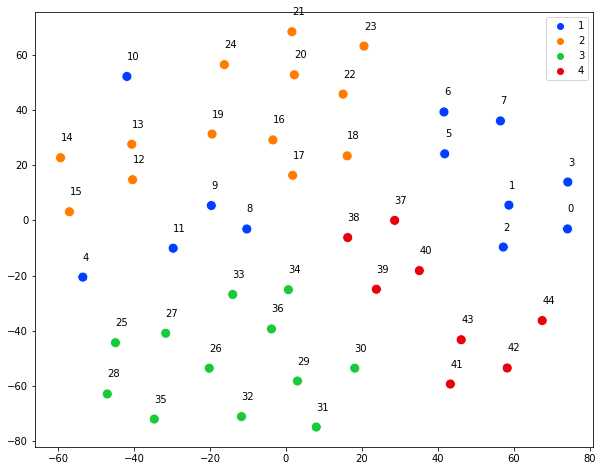

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))

hue = [1] * 12 + [2] * 13 + [3] * 12 + [4] * 8

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], data=X_tsne, hue = hue, palette = "bright", s=100)
for i, val in enumerate(X_tsne):
    plt.annotate(i, (val[0], val[1] + 6))

# Without cleaning

[t-SNE] Computing 44 nearest neighbors...
[t-SNE] Indexed 45 samples in 0.001s...
[t-SNE] Computed neighbors for 45 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 45 / 45
[t-SNE] Mean sigma: 0.498499
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.197517
[t-SNE] KL divergence after 1000 iterations: 0.291060


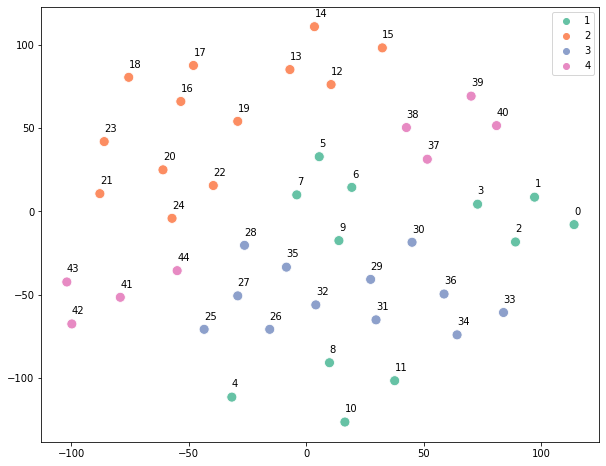

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)

from sklearn.manifold import TSNE
# call TSNE() to fit the data

tsne = TSNE(n_components = 2, perplexity = 30, verbose = 1, random_state = 42)
X_wctsne = tsne.fit_transform(X.toarray())

import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(figsize=(10,8))

hue = [1] * 12 + [2] * 13 + [3] * 12 + [4] * 8

sns.scatterplot(X_wctsne[:,0], X_wctsne[:,1], data = X_wctsne, hue = hue, palette = "Set2", s=100)
for i, val in enumerate(X_wctsne):
    plt.annotate(i, (val[0], val[1] + 6))

**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  
A high-dimensional data visualization technique is called t-SNE. By transforming similarities between data points to joint probabilities, it aims to decrease the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

By dividing high-dimensional document vectors into two dimensions and using probability distributions from both the original dimensionality and the decomposed dimensionality, t-SNE effectively clusters related documents.

T-SNE can group documents belonging to the same category together. Four sorts of papers were included in the aforementioned categorisation. 1. Disease 2. Data Science 3. Sports 4. Music. Each category had between 10 and 12 items. Each hue in the aforementioned plot stands for a specific category.

# Question 3. Building Multinomial Naive Bayes and Neural Networks on Countvectors

### We are gonna use Disaster Tweets Datasset for this task. We need to Predict which Tweets are about real disasters and which ones are not.

### We are providing data.csv file along with this notebook. 

### Library Imports and Utility functions

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [ ]:
# Import the data.csv only use 'text' and 'target' columns

# data
data = pd.read_csv('data-1.csv', usecols=['text', 'target'])
# and printout the train.shape and validation.shape 

data.shape
# expected shape of dataset is (7613, 2)

(7613, 2)

In [ ]:
# clean the text in the dataframe using the clean_text function provided above
data['text'] = data['text'].apply(clean_text)

In [ ]:
# initialise count vectorizer from sklearn module with default parameter
count_vect = CountVectorizer()

X_cv = count_vect.fit_transform(data['text'])
X_cv = X_cv.toarray()
# fit and transform on dataset

In [ ]:
# get the values of target column
y = data['target'].values

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

  # layer 1 : input layer
  inp = tf.keras.Input((X.shape[1],))

  # layer 2 : add the dense layer with 64 units and relu activation
  x = tf.keras.layers.Dense(64, activation='relu')(inp)

  # layer 3 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

  # layer 5 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 6 : add the dense layer with 16 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(16, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

  # layer 7 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 8 : output layer with units equal to 1 and activation as sigmoid
  out = tf.keras.layers.Dense(1, activation='sigmoid')(x)

  # create model
  model = tf.keras.models.Model(inputs=inp, outputs=out)

  # use loss as binary crossentropy, optimizer as rmsprop and evaluate model on auc 
  model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=[tf.keras.metrics.AUC(), 'accuracy'])

  return model

Epoch 1/5
381/381 [==============================] - 4s 7ms/step - loss: 0.7938 - auc_9: 0.7175 - accuracy: 0.6647 - val_loss: 0.5459 - val_auc_9: 0.8430 - val_accuracy: 0.8017
Epoch 2/5
381/381 [==============================] - 2s 6ms/step - loss: 0.4946 - auc_9: 0.8722 - accuracy: 0.8217 - val_loss: 0.4947 - val_auc_9: 0.8521 - val_accuracy: 0.8076
Epoch 3/5
381/381 [==============================] - 2s 6ms/step - loss: 0.4223 - auc_9: 0.9042 - accuracy: 0.8481 - val_loss: 0.4899 - val_auc_9: 0.8552 - val_accuracy: 0.8017
Epoch 4/5
381/381 [==============================] - 2s 6ms/step - loss: 0.3935 - auc_9: 0.9133 - accuracy: 0.8626 - val_loss: 0.4963 - val_auc_9: 0.8552 - val_accuracy: 0.8037
Epoch 5/5
381/381 [==============================] - 2s 6ms/step - loss: 0.3713 - auc_9: 0.9224 - accuracy: 0.8734 - val_loss: 0.5064 - val_auc_9: 0.8534 - val_accuracy: 0.8070


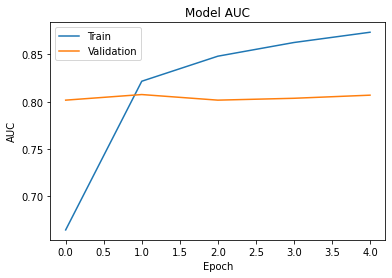

Epoch 1/5
381/381 [==============================] - 4s 7ms/step - loss: 0.7786 - auc_10: 0.7211 - accuracy: 0.6557 - val_loss: 0.5424 - val_auc_10: 0.8491 - val_accuracy: 0.7971
Epoch 2/5
381/381 [==============================] - 2s 6ms/step - loss: 0.4938 - auc_10: 0.8729 - accuracy: 0.8202 - val_loss: 0.4894 - val_auc_10: 0.8588 - val_accuracy: 0.8056
Epoch 3/5
381/381 [==============================] - 2s 6ms/step - loss: 0.4314 - auc_10: 0.8992 - accuracy: 0.8491 - val_loss: 0.4827 - val_auc_10: 0.8607 - val_accuracy: 0.8096
Epoch 4/5
381/381 [==============================] - 2s 6ms/step - loss: 0.3980 - auc_10: 0.9123 - accuracy: 0.8637 - val_loss: 0.4871 - val_auc_10: 0.8617 - val_accuracy: 0.8050
Epoch 5/5
381/381 [==============================] - 2s 6ms/step - loss: 0.3775 - auc_10: 0.9194 - accuracy: 0.8698 - val_loss: 0.4945 - val_auc_10: 0.8634 - val_accuracy: 0.7991


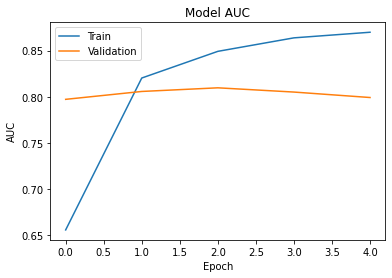

Epoch 1/5
381/381 [==============================] - 4s 7ms/step - loss: 0.7911 - auc_11: 0.7170 - accuracy: 0.6617 - val_loss: 0.5519 - val_auc_11: 0.8315 - val_accuracy: 0.7741
Epoch 2/5
381/381 [==============================] - 2s 6ms/step - loss: 0.4829 - auc_11: 0.8782 - accuracy: 0.8245 - val_loss: 0.5095 - val_auc_11: 0.8407 - val_accuracy: 0.7886
Epoch 3/5
381/381 [==============================] - 2s 6ms/step - loss: 0.4279 - auc_11: 0.9001 - accuracy: 0.8488 - val_loss: 0.5199 - val_auc_11: 0.8399 - val_accuracy: 0.7965
Epoch 4/5
381/381 [==============================] - 2s 6ms/step - loss: 0.3886 - auc_11: 0.9165 - accuracy: 0.8639 - val_loss: 0.5405 - val_auc_11: 0.8432 - val_accuracy: 0.7912
Epoch 5/5
381/381 [==============================] - 2s 6ms/step - loss: 0.3699 - auc_11: 0.9227 - accuracy: 0.8696 - val_loss: 0.5152 - val_auc_11: 0.8435 - val_accuracy: 0.7925


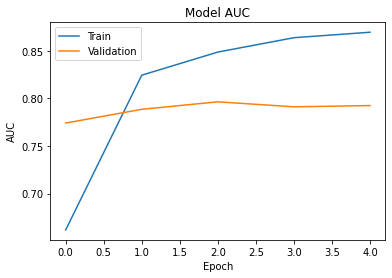

Epoch 1/5
381/381 [==============================] - 4s 7ms/step - loss: 0.7955 - auc_12: 0.7222 - accuracy: 0.6644 - val_loss: 0.5576 - val_auc_12: 0.8424 - val_accuracy: 0.7779
Epoch 2/5
381/381 [==============================] - 2s 6ms/step - loss: 0.4995 - auc_12: 0.8702 - accuracy: 0.8215 - val_loss: 0.5116 - val_auc_12: 0.8496 - val_accuracy: 0.7957
Epoch 3/5
381/381 [==============================] - 2s 6ms/step - loss: 0.4299 - auc_12: 0.8998 - accuracy: 0.8491 - val_loss: 0.4965 - val_auc_12: 0.8560 - val_accuracy: 0.7957
Epoch 4/5
381/381 [==============================] - 2s 6ms/step - loss: 0.3915 - auc_12: 0.9157 - accuracy: 0.8641 - val_loss: 0.4952 - val_auc_12: 0.8581 - val_accuracy: 0.8088
Epoch 5/5
381/381 [==============================] - 2s 6ms/step - loss: 0.3697 - auc_12: 0.9233 - accuracy: 0.8728 - val_loss: 0.5002 - val_auc_12: 0.8586 - val_accuracy: 0.8108


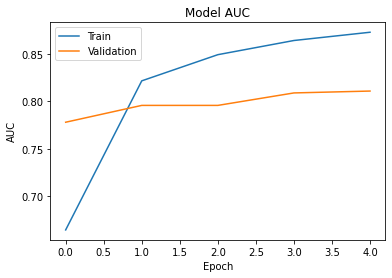

Epoch 1/5
381/381 [==============================] - 4s 7ms/step - loss: 0.7876 - auc_13: 0.7327 - accuracy: 0.6708 - val_loss: 0.5435 - val_auc_13: 0.8442 - val_accuracy: 0.7878
Epoch 2/5
381/381 [==============================] - 2s 6ms/step - loss: 0.4875 - auc_13: 0.8783 - accuracy: 0.8252 - val_loss: 0.4945 - val_auc_13: 0.8560 - val_accuracy: 0.7970
Epoch 3/5
381/381 [==============================] - 2s 6ms/step - loss: 0.4301 - auc_13: 0.8997 - accuracy: 0.8475 - val_loss: 0.4844 - val_auc_13: 0.8603 - val_accuracy: 0.7970
Epoch 4/5
381/381 [==============================] - 2s 6ms/step - loss: 0.3898 - auc_13: 0.9175 - accuracy: 0.8632 - val_loss: 0.4834 - val_auc_13: 0.8616 - val_accuracy: 0.8009
Epoch 5/5
381/381 [==============================] - 2s 6ms/step - loss: 0.3689 - auc_13: 0.9244 - accuracy: 0.8754 - val_loss: 0.4846 - val_auc_13: 0.8642 - val_accuracy: 0.7983


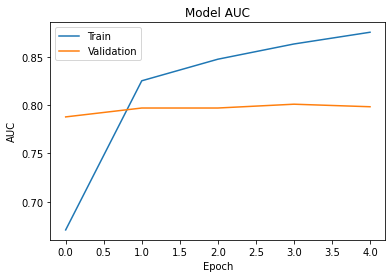

In [ ]:
# Now we will initialise the stratified K-Fold from sklearn with nsplits as 5

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state=1)

# Now Split the countvectors and target (y)
splits = skf.split(X_cv, y)

# iterate through the train and valid index in splits for 5 folds
for train_index, valid_index in splits:
  # Get X_train, X_valid, y_train, y_valid using indexes
  X_train, X_valid = X_cv[train_index], X_cv[valid_index]
  y_train, y_valid = y[train_index], y[valid_index]
  
  #call the build_model function and initialize the model
  model = build_model(X_train)

  # train and validate the model on the count vectors of text which we have created initially for 5 epochs, 
  # adjust batch size according to your computation power (suggestion use : 16)
  history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5, batch_size=16)

  # plot the graph between training auc and validation auc
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model AUC')
  plt.ylabel('AUC')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

### Q) Comment on the plots. How did it varied across different folds for neural networks?

We can observe from the plots that the model performs similarly on the train dataset and the validation dataset. It might be a sign to terminate training at a previous epoch if these parallel plots begin to diverge consistently. As a result, each epoch saw a significant rise in the values of training and validation accuracy.

# Building Multinomial Navie Bayes on Countvectors

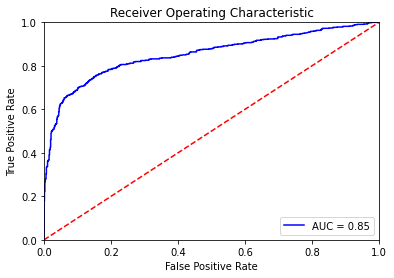

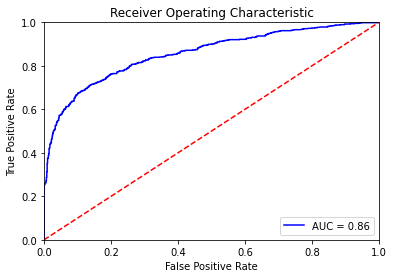

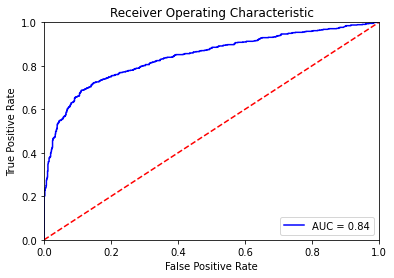

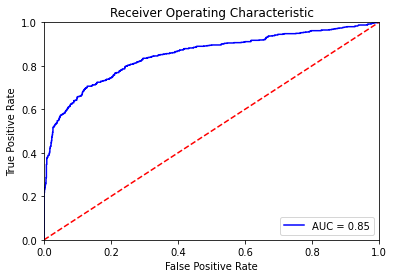

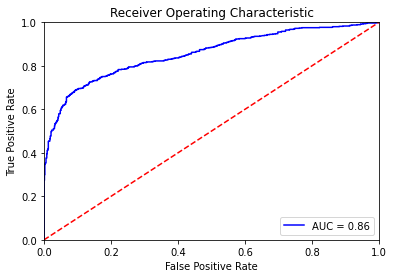

In [ ]:
# iterate through the train and valid index in splits for 5 folds. Use the splits created above.

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

splits = skf.split(X_cv, y)

  # Get X_train, X_valid, y_train, y_valid using indexes
for train_index_nb, valid_index_nb in splits:
  X_train, X_valid = X_cv[train_index_nb], X_cv[valid_index_nb]
  y_train, y_valid = y[train_index_nb], y[valid_index_nb]

  # intialise multinomial navie bayes with default parameters
  clf = MultinomialNB()

  # fit the data
  clf.fit(X_train, y_train)

  y_pred = clf.predict_proba(X_valid)[:,1]

  fpr, tpr, threshold = roc_curve(y_valid, y_pred)
  roc_auc = auc(fpr, tpr)

  # plot AUC-ROC curve for validation data

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

### Q) Comment on the plots. How did it varied across different folds for Multinomial Naive Bayes?

The AUC values for the plots across different folds for Multinomial Naive Bayes between False Positive Rate and True Positive Rate is fluctuating. For the 1st fold it was 0.85 which got decreased to 0.84 in 3rd fold and again rose to 0.86 in 5th fold.

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

*CountVectorizer:*

It is used to turn a given text into a vector based on the number of times (count) that each word appears across the full text. This is useful when we have several of these texts and want to turn each word into a vector (for use in further text analysis). Each text sample from the document is represented by a row in the matrix that is created by CountVectorizer, and each unique word is represented by a column of the matrix. TfidfVectorizer is what we utilize to get around this.

*TfidfVectorizer:*

Here, we take into account a word's entire document weight. It aids us in navigating the most common words. We can punish them with it. The word counts are weighted by a measure of how frequently they appear in the manuscript by TfidfVectorizer. It is a system of rating words that determines how significant a word is to a piece of writing. In order to successfully exclude common terms, TF-IDF highlights unusual words. Although it is technically far more elegant than setting hard cutoff thresholds, it is closely related to frequency-based filters.
*Word2Vec:*

For a neural network, texts are used as training data. Words that appear in comparable situations are captured by the ensuing embedding. It computes word embeddings depending on the context of the words using tiny neural networks. There are two ways to carry out this strategy. First, there is what is known as the continuous bag of words (CBOW). This strategy uses a neural network to determine which word, given the context, is most likely. It is possible to view words as having a common dimension if they are equally likely to appear. This method forecasts a comparable chance for both if we can swap out "cat" for "dog" in a sentence. We conclude that these words have comparable meanings on at least one level as a result. Skip-gram is the second strategy.The concept is extremely similar, except the network operates in the reverse direction.  

*Glove:*

It emphasizes word co-occurrences over the entire text. The likelihood that two words will appear together are related by its embeddings. It stresses the importance of knowing the frequency of co-occurrences and discourages using them as extra training examples. Instead, GloVe creates word embeddings so that a grouping of word vectors directly connects to the likelihood that these words will occur together in the corpus. In contrast to Word2Vec, the GloVe is not a trained model. Instead, its embeddings can be seen as a low-dimensional summary of the training corpus that highlights co-occurrences.

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**

*Bag of Words*

An easy way to manage text data is by using Bag-of-Words. Using this method, a written document is transformed into a group of vectors that show the frequency of each word in the text. This method's drawback is that it masks the semantic significance of the words. For instance, there is no semantic difference between "not terrible" and "decent" or "good." But when used alone, the words "not" and "bad" are semantically comparable. With the use of various text processing methods like stopword removal, stemming, etc., the feature space can be minimized. However, Bag-of-Words has the drawback of favoring terms in the first stage based only on counts. To get around this, the TF-IDF approach is presented as a straightforward variant of bag-of-words.


*TF-IDF*

Both the more significant words and the less significant ones are covered. Each word count is normalized by dividing it by the number of documents in which the word appears. The total number of documents is "N." Inverse document frequency is defined as (N / (# of documents in which word w appears)). The fundamental tenet of this method is that a word's inverse document frequency is 1 if it appears in all documents. In the same way, if a term only appears in a small number of documents, its inverse document frequency will be substantially larger than 1. In comparison to setting hard cutoff thresholds, it is mathematically far more elegant and is strongly related to frequency-based filters. It is crucial to employ various feature reduction techniques, such as stemming, part-of-speech, etc., when modeling an algorithm on the TF-IDF feature space in order to achieve an effective outcome. In machine learning models, TF-IDF hence works better and is more effective.